In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("social_ads.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
display(data.nunique())

Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [5]:
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

The data is clean and we can go ahead with visualisation

# Data Visualisation

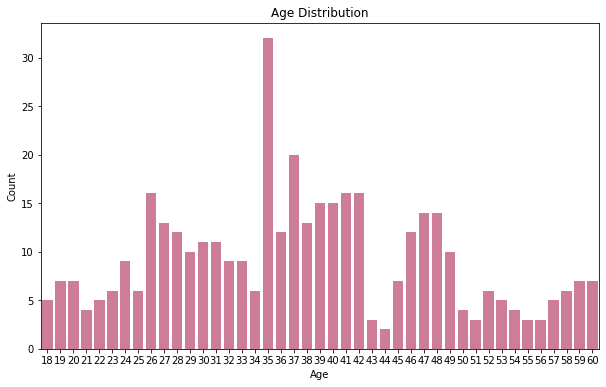

In [8]:
# Visualisation of Age 
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',data=data, color='palevioletred')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

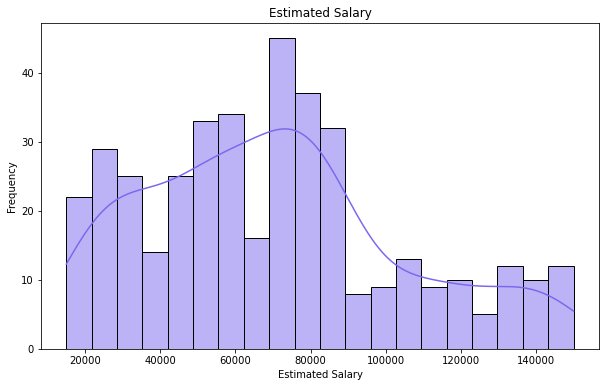

In [9]:
# Visualisation of the Estimated Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['EstimatedSalary'], bins=20, kde=True, color='mediumslateblue')
plt.title('Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Calculating mean, median, mode and standard diviation of Estimated Salary:
mean_salary = data['EstimatedSalary'].mean()
median_salary = data['EstimatedSalary'].median()
mode_salary = data['EstimatedSalary'].mode()[0]
std_deviation_salary = data['EstimatedSalary'].std()

In [11]:
#Displaing the mean, median, mode and standard diviation of Estimated Salary:
print("Estimated Salary Mean:", mean_salary)
print("Median Estimated Salary Median:", median_salary)
print("Mode Estimated Salary Mode:", mode_salary)
print("Estimated Salary Standard Deviation:", std_deviation_salary)

Estimated Salary Mean: 69742.5
Median Estimated Salary Median: 70000.0
Mode Estimated Salary Mode: 72000
Estimated Salary Standard Deviation: 34096.960282424785


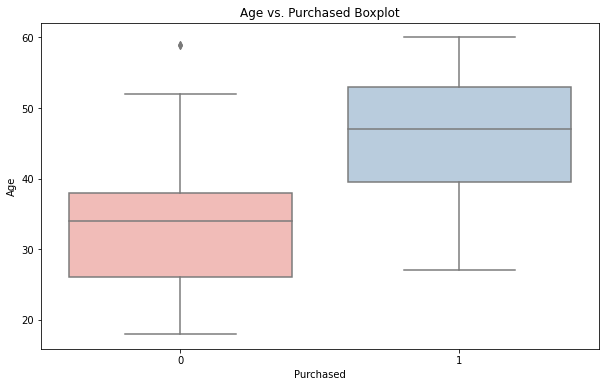

In [12]:
# Visualisation Boxplot of Age vs. Purchased
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='Age', data=data, palette='Pastel1')
plt.title('Age vs. Purchased Boxplot')
plt.xlabel('Purchased')
plt.ylabel('Age')
plt.show()

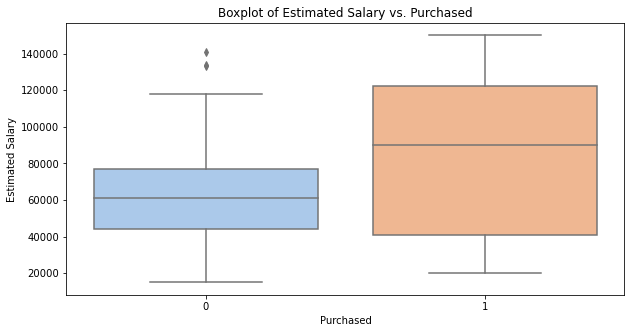

In [13]:
# Visualisation of Estimated Salary vs. Purchased
plt.figure(figsize=(10, 5))
sns.boxplot(x='Purchased', y='EstimatedSalary', data=data, palette='pastel')
plt.title('Boxplot of Estimated Salary vs. Purchased')
plt.xlabel('Purchased')
plt.ylabel('Estimated Salary')
plt.show()

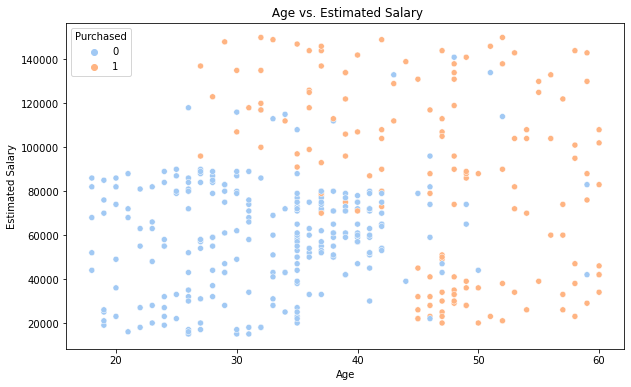

In [14]:
# Visualisation of Age vs estimated Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data, palette='pastel')
plt.title(' Age vs. Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

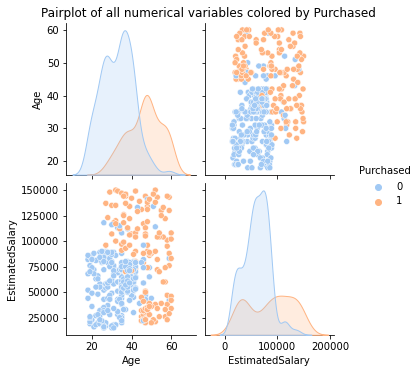

In [15]:
# Visualisation of all numerical variables
sns.pairplot(data, hue='Purchased', palette='pastel')
plt.suptitle('Pairplot of all numerical variables colored by Purchased', y=1.02)
plt.show()

# Making Predictions

In [16]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [17]:
# Dropping the Purchase column
x = data.drop(columns ='Purchased', axis=1)

In [18]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [19]:
y = data['Purchased']

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score, r2_score

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# Standardising the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#Creating and Training Random Forest Classifier Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
#Making prediction on the test data
y_pred = rf_classifier.predict(X_test)

In [26]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [27]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



In [28]:
#Creating and Training Logic Regression Model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred_logic = logreg.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred_logic))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [30]:
#Creating and Training Decision Tree Classifier Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9125


In [33]:
report=classification_report(y_test, y_pred_tree)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svm))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svm))
